## Observations and Insights 

# type them here

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Set display option for number of rows
pd.set_option('display.max_rows', 100)

In [6]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
combined_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [8]:
# Checking the number of mice.
len(pd.unique(combined_df['Mouse ID']))

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_df = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

# Optional: Get all the data for the duplicate mouse ID. 
dupe_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# As shown in the above dataframe, this mouse has an id of 'g989', so we'll create a cleaned 
# DF that includes all of the combined DF minus this mouse. 
clean_df = combined_df.loc[combined_df['Mouse ID'] != 'g989']

In [11]:
# Checking the number of mice in the clean DataFrame. 
# Should be 249 - 1 = 248.
len(pd.unique(clean_df['Mouse ID']))

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_df = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble (i.e., concatenate) the resulting series into a single summary dataframe.
summary_df = pd.concat([mean_df, median_df, var_df, std_df, sem_df], axis=1)

# Now rename the columns, since each column name will just say "Tumor Volume (mm3)".
# We are using the iloc method here because a dictionary simply won't work, as each column in the 
# above conactenation function ends up having the same name. So this way works!
s = summary_df.columns.to_series()
s.iloc[0] = 'Mean Tumor Volume (mm3)'
s.iloc[1] = 'Median Tumor Volume (mm3)'
s.iloc[2] = 'Variance of Tumor Volume (mm3)'
s.iloc[3] = 'Standard Deviation of Tumor Volume (mm3)'
s.iloc[4] = 'SEM of Tumor Volume (mm3)'
summary_df.columns = s

summary_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_df2 = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

# Use the same method here to rename the columns to more helpful descriptions.
# I very well could use a dictionary to create the new column names, but this method works just as well and is a 
# simple copy-and-paste from above, with a few minor tweaks
s = summary_df2.columns.to_series()
s.iloc[0] = 'Mean Tumor Volume (mm3)'
s.iloc[1] = 'Median Tumor Volume (mm3)'
s.iloc[2] = 'Variance of Tumor Volume (mm3)'
s.iloc[3] = 'Standard Deviation of Tumor Volume (mm3)'
s.iloc[4] = 'SEM of Tumor Volume (mm3)'
summary_df2.columns = s

summary_df2

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

(0.0, 250.0)

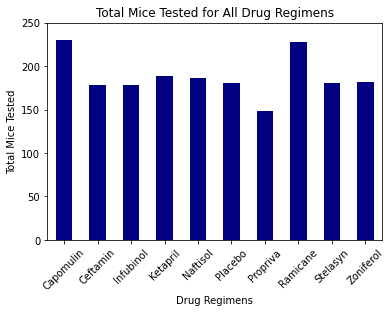

In [96]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# First, we create a new DataFrame by grouping the cleaned DataFrame by Drug Regimen.
bar_df = clean_df.groupby('Drug Regimen').count()
bar_df
# Using bracket notation, we can create a bar chart of this data. First we'll generate it, then clean it up with
# a title, labels, and limits
chart = bar_df['Mouse ID'].plot(kind='bar', rot=45, color='#000080', 
                                 title="Total Mice Tested for All Drug Regimens",
                                 width=0.5)
chart.set_xlabel("Drug Regimens")
chart.set_ylabel("Total Mice Tested")
chart.set_ylim(0,250)

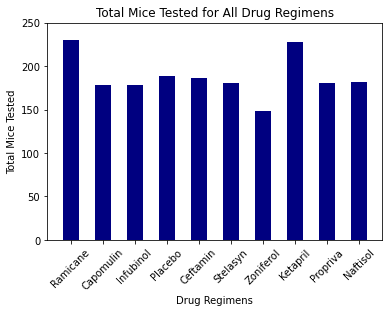

In [90]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# first, we need to establish our x-axis by taking the unique values from the 'Drug Regimen' column
x_axis = np.arange(len(clean_df['Drug Regimen'].unique()))
x_labels = clean_df["Drug Regimen"].unique()
tl = [each for each in x_axis]

# Here are the y values for our bar chart
y = bar_df['Mouse ID']

# Make the bar chart, inputting necessary arguments
plt.figure(figsize=(6,4)) 
plt.bar(x_axis, y, align="center", color="#000080", width=0.5)
plt.title("Total Mice Tested for All Drug Regimens")
plt.xlabel("Drug Regimens")
plt.ylabel("Total Mice Tested")
plt.xticks(tl, x_labels, rotation=45)
plt.ylim(0,250)
plt.show()

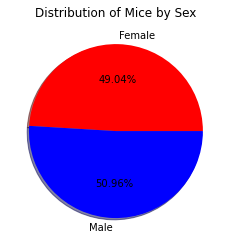

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# First, create a list of the 2 colors we'll use in the pie plot
color_list = ["red","blue"]

clean_df.groupby('Sex').count().plot(kind="pie", 
                                     y="Mouse ID",
                                     title="Distribution of Mice by Sex",
                                     autopct="%1.02f%%",
                                     colors=color_list,
                                     ylabel='',
                                     legend=False,
                                     shadow=True)
plt.show()

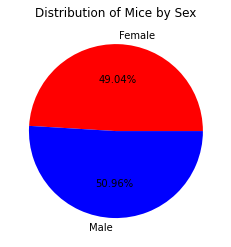

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the 2 sections of our pie chart. 
gender_labels = ["Female", "Male"]

# The number of male / female mice in the study
gender_breakdown = clean_df.groupby('Sex')['Mouse ID'].count()

# Color list for the 2 slices
color_list = color_list = ["red","blue"]
plt.pie(gender_breakdown, labels=gender_labels, autopct="%1.2f%%", colors=color_list)
plt.title("Distribution of Mice by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
